In [1]:
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


In [2]:
# Currenlty this is required as it doesnt seem to be included in the distribution. 
# We'll add this to the docker image later, but for now leave it
%pip install openpyxl


Processing ./.cache/pip/wheels/41/ba/1e/266431033670ab5b010a3eddba51cf1a6dc5cbc7231e32f464/openpyxl-3.0.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f0/da/572cbc0bc582390480bbd7c4e93d14dc46079778ed915b505dc494b37c57/jdcal-1.4.1-py2.py3-none-any.whl
Processing ./.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39/et_xmlfile-1.0.1-cp37-none-any.whl
Note: you may need to restart the kernel to use updated packages.


# Process the file and make some tables for display in the paper

## 1.) Process the raw output to prepare for the consistency analysis of the paper

Read in the data, and drop unnecesary columns


In [3]:
# Open the Txt files
# Remove the top two lines

directory_raw = 'AnalysisResults/TextFiles/RawAnalysisOutput'
directory_semi = 'AnalysisResults/TextFiles/SemicleanedExcelFiles'
directory_polished = 'AnalysisResults/TextFiles/PolishedExcelFilesForPaper'

# Abd-Pelvis
fname_abdpelv ='CohortComparison-v2__percentileReported-50__minNumDataPoints-11__whichPhase-1__reqNoMissingData-True__Abd-Pelvis_Protocols.txt'
#fname='CohortComparison-Abd-Pelvis_Protocol.txt'
sheet_abdpelv = 'Final_Abd-Pelvis'
# Chest
fname_chest ='CohortComparison-v2__percentileReported-50__minNumDataPoints-11__whichPhase-1__reqNoMissingData-True__Chest_Protocols.txt'
#fname='CohortComparison-Chest_Protocol.txt'
sheet_chest = 'Final_Chest'

oname_consistency = 'AnalysisCondensing_Template_Completed.xlsx'
rawresult_df_abdpelv = pd.read_table(directory_raw+'/'+fname_abdpelv, sep='|',skiprows=2,header=0)
rawresult_df_chest = pd.read_table(directory_raw+'/'+fname_chest, sep='|',skiprows=2,header=0)


# Make the new output df and drop unneccessary columns
consistencyInput_df_abdpelv = rawresult_df_abdpelv
consistencyInput_df_abdpelv = consistencyInput_df_abdpelv.drop(['kVp p<0.05','kVp Child Sized',  'mAs p<0.05','mAs Child Sized',  'Pitch p<0.05'  ,'Pitch Child Sized',  'RevTime p<0.05','RevTime Child Sized' , 'CTDI p<0.05',  'CTDI Child Sized',  'SSDE p<0.05','SSDE Child Sized',  'PedCTDIvol',  'PedSSDE',  'AdultCTDIvol',  'AdultSSDE' , 'Unnamed: 19'],axis=1)

consistencyInput_df_chest = rawresult_df_chest
consistencyInput_df_chest = consistencyInput_df_chest.drop(['kVp p<0.05','kVp Child Sized',  'mAs p<0.05','mAs Child Sized',  'Pitch p<0.05'  ,'Pitch Child Sized',  'RevTime p<0.05','RevTime Child Sized' , 'CTDI p<0.05',  'CTDI Child Sized',  'SSDE p<0.05','SSDE Child Sized',  'PedCTDIvol',  'PedSSDE',  'AdultCTDIvol',  'AdultSSDE' , 'Unnamed: 19'],axis=1)


 Make the columns of whether the change is significant, and in the right direction


In [4]:
# Make the columns of whether they are both true

#Abd pelvis
consistencyInput_df_abdpelv['kVp'] = ((rawresult_df_abdpelv['kVp p<0.05'] ==True) & (rawresult_df_abdpelv['kVp Child Sized'] == True))
consistencyInput_df_abdpelv['mAs'] = ((rawresult_df_abdpelv['mAs p<0.05'] ==True) & (rawresult_df_abdpelv['mAs Child Sized'] == True))
consistencyInput_df_abdpelv['Pitch'] = ((rawresult_df_abdpelv['Pitch p<0.05'] ==True) & (rawresult_df_abdpelv['Pitch Child Sized'] == True))
consistencyInput_df_abdpelv['Rot. Time'] = ((rawresult_df_abdpelv['RevTime p<0.05'] ==True) & (rawresult_df_abdpelv['RevTime Child Sized'] == True))
consistencyInput_df_abdpelv['CTDIvol'] = ((rawresult_df_abdpelv['CTDI p<0.05'] ==True) & (rawresult_df_abdpelv['CTDI Child Sized'] == True))
consistencyInput_df_abdpelv['SSDE'] = ((rawresult_df_abdpelv['SSDE p<0.05'] ==True) & (rawresult_df_abdpelv['SSDE Child Sized'] == True))

#Chest
consistencyInput_df_chest['kVp'] = ((rawresult_df_chest['kVp p<0.05'] ==True) & (rawresult_df_chest['kVp Child Sized'] == True))
consistencyInput_df_chest['mAs'] = ((rawresult_df_chest['mAs p<0.05'] ==True) & (rawresult_df_chest['mAs Child Sized'] == True))
consistencyInput_df_chest['Pitch'] = ((rawresult_df_chest['Pitch p<0.05'] ==True) & (rawresult_df_chest['Pitch Child Sized'] == True))
consistencyInput_df_chest['Rot. Time'] = ((rawresult_df_chest['RevTime p<0.05'] ==True) & (rawresult_df_chest['RevTime Child Sized'] == True))
consistencyInput_df_chest['CTDIvol'] = ((rawresult_df_chest['CTDI p<0.05'] ==True) & (rawresult_df_chest['CTDI Child Sized'] == True))
consistencyInput_df_chest['SSDE'] = ((rawresult_df_chest['SSDE p<0.05'] ==True) & (rawresult_df_chest['SSDE Child Sized'] == True))


Write the results to sheets in a single file

In [5]:
# Save the file
with pd.ExcelWriter(directory_semi+'/'+oname_consistency) as writer:  # doctest: +SKIP
    consistencyInput_df_abdpelv.to_excel(writer, sheet_name=sheet_abdpelv,index=False)
    consistencyInput_df_chest.to_excel(writer, sheet_name=sheet_chest,index=False)

## 2.) Process the raw output to create a table for the appendix

Load in the dataset from the last step

In [6]:
# Create the dataframe

# Abd-pelvis
finalAppendix_df_abdpelv = consistencyInput_df_abdpelv.drop(['N'],axis=1)

# Chest
finalAppendix_df_chest = consistencyInput_df_chest.drop(['N'],axis=1)



Switch all True to  check marks, and False to '', and format the columns


In [43]:
dplace = 10 # how many decimal places to round to

# Abd-Pelvis
finalAppendix_df_abdpelv_checks = finalAppendix_df_abdpelv.replace(True,u'\u2713').replace(False,'QQQ')
finalAppendix_df_abdpelv_checks
finalAppendix_df_abdpelv_checks['Ped. CTDIvol'] = ((finalAppendix_df_abdpelv_checks['CTDIvol']).replace(True,u'\u2713').replace(False,'QQQ')+', '+rawresult_df_abdpelv['PedCTDIvol'].round(dplace).astype(str)).str.replace('QQQ, ','',regex=False)
finalAppendix_df_abdpelv_checks['Ped. SSDE'] = ((finalAppendix_df_abdpelv_checks['SSDE']).replace(True,u'\u2713').replace(False,'QQQ')+', '+rawresult_df_abdpelv['PedSSDE'].round(dplace).astype(str)).str.replace('QQQ, ','',regex=False)
finalAppendix_df_abdpelv_checks['Adult CTDIvol'] = (rawresult_df_abdpelv['AdultCTDIvol'].round(dplace).astype(str)).str.replace('QQQ, ','',regex=False)
finalAppendix_df_abdpelv_checks['Adult SSDE'] = (rawresult_df_abdpelv['AdultSSDE'].round(dplace).astype(str)).str.replace('QQQ, ','',regex=False)
finalAppendix_df_abdpelv_checks = finalAppendix_df_abdpelv_checks.replace('QQQ, ','',regex=False).replace('QQQ','',regex=False)
finalAppendix_df_abdpelv_checks = finalAppendix_df_abdpelv_checks.drop(['CTDIvol','SSDE'],axis=1)



# Chest
finalAppendix_df_chest_checks = finalAppendix_df_chest.replace(True,u'\u2713').replace(False,'QQQ')
finalAppendix_df_chest_checks
finalAppendix_df_chest_checks['Ped. CTDIvol'] = ((finalAppendix_df_chest_checks['CTDIvol']).replace(True,u'\u2713').replace(False,'QQQ')+', '+rawresult_df_chest['PedCTDIvol'].round(dplace).astype(str)).str.replace('QQQ, ','',regex=False)
finalAppendix_df_chest_checks['Ped. SSDE'] = ((finalAppendix_df_chest_checks['SSDE']).replace(True,u'\u2713').replace(False,'QQQ')+', '+rawresult_df_chest['PedSSDE'].round(dplace).astype(str)).str.replace('QQQ, ','',regex=False)
finalAppendix_df_chest_checks['Adult CTDIvol'] = (rawresult_df_chest['AdultCTDIvol'].round(dplace).astype(str)).str.replace('QQQ, ','',regex=False)
finalAppendix_df_chest_checks['Adult SSDE'] = (rawresult_df_chest['AdultSSDE'].round(dplace).astype(str)).str.replace('QQQ, ','',regex=False)
finalAppendix_df_chest_checks = finalAppendix_df_chest_checks.replace('QQQ, ','',regex=False).replace('QQQ','',regex=False)
finalAppendix_df_chest_checks = finalAppendix_df_chest_checks.drop(['CTDIvol','SSDE'],axis=1)


Write the results to sheets in a single file

In [21]:
oname_final = 'AppendixTable.xlsx'

with pd.ExcelWriter(directory_polished+'/'+oname_final) as writer:  # doctest: +SKIP
    finalAppendix_df_abdpelv_checks.to_excel(writer, sheet_name=sheet_abdpelv,index=False)
    finalAppendix_df_chest_checks.to_excel(writer, sheet_name=sheet_chest,index=False)

## 3.) Process the consistency output and make some more tables for display

In [22]:
# Loop over the consistency output, and count the number of facilities that do things consistently
nParams = 6

# abd pelv
endConsistency_abdpelv_df=[]
endCounts_abdpelv_df=[]
endConsistency_abdpelv_df = pd.DataFrame(columns=['Facility','Consistent_kVp','Consistent_mAs','Consistent_Pitch','Consistent_RotTime','Consistent_CTDIvol','Consistent_SSDE','N_Ped_Cohorts'])
endCounts_abdpelv_df = pd.DataFrame(columns=['Facility','Counts_ConsistentkVp','Counts_ConsistentmAs','Counts_ConsistentPitch','Counts_ConsistentRotTime','Counts_ConsistentCTDIvol','Counts_ConsistentSSDE','N_Ped_Cohorts'])
for i in sorted(list(set(consistencyInput_df_abdpelv.Facility))):
    
    theseIdx = consistencyInput_df_abdpelv.Facility==i
    thisDat = consistencyInput_df_abdpelv.loc[theseIdx,:]
    
    
    ncohorts = np.sum(theseIdx)
    thisFac = i
    n_kvconst = np.sum(thisDat['kVp']) 
    n_maconst = np.sum(thisDat['mAs'])
    n_pitchconst = np.sum(thisDat['Pitch'])
    n_rottimeconst = np.sum(thisDat['Rot. Time']) 
    n_ctdiconst = np.sum(thisDat['CTDIvol']) 
    n_ssdeconst = np.sum(thisDat['SSDE']) 
    
    endConsistency_abdpelv_df = endConsistency_abdpelv_df.append(pd.Series([thisFac, n_kvconst==ncohorts, n_maconst==ncohorts, n_pitchconst==ncohorts, n_rottimeconst==ncohorts, n_ctdiconst==ncohorts, n_ssdeconst==ncohorts, ncohorts], index=endConsistency_abdpelv_df.columns ), ignore_index=True)
    endCounts_abdpelv_df = endCounts_abdpelv_df.append(pd.Series([thisFac, n_kvconst, n_maconst, n_pitchconst, n_rottimeconst, n_ctdiconst, n_ssdeconst, ncohorts], index=endCounts_abdpelv_df.columns ), ignore_index=True)

    
endConsistency_chest_df=[]
endCounts_chest_df=[]
endConsistency_chest_df = pd.DataFrame(columns=['Facility','Consistent_kVp','Consistent_mAs','Consistent_Pitch','Consistent_RotTime','Consistent_CTDIvol','Consistent_SSDE','N_Ped_Cohorts'])
endCounts_chest_df = pd.DataFrame(columns=['Facility','Counts_ConsistentkVp','Counts_ConsistentmAs','Counts_ConsistentPitch','Counts_ConsistentRotTime','Counts_ConsistentCTDIvol','Counts_ConsistentSSDE','N_Ped_Cohorts'])
for i in sorted(list(set(consistencyInput_df_chest.Facility))):
    
    theseIdx = consistencyInput_df_chest.Facility==i
    thisDat = consistencyInput_df_chest.loc[theseIdx,:]
    
    
    ncohorts = np.sum(theseIdx)
    thisFac = i
    n_kvconst = np.sum(thisDat['kVp']) 
    n_maconst = np.sum(thisDat['mAs'])
    n_pitchconst = np.sum(thisDat['Pitch'])
    n_rottimeconst = np.sum(thisDat['Rot. Time']) 
    n_ctdiconst = np.sum(thisDat['CTDIvol']) 
    n_ssdeconst = np.sum(thisDat['SSDE']) 
    
    endConsistency_chest_df = endConsistency_chest_df.append(pd.Series([thisFac, n_kvconst==ncohorts, n_maconst==ncohorts, n_pitchconst==ncohorts, n_rottimeconst==ncohorts, n_ctdiconst==ncohorts, n_ssdeconst==ncohorts, ncohorts], index=endConsistency_chest_df.columns ), ignore_index=True)
    endCounts_chest_df = endCounts_chest_df.append(pd.Series([thisFac, n_kvconst, n_maconst, n_pitchconst, n_rottimeconst, n_ctdiconst, n_ssdeconst, ncohorts], index=endCounts_chest_df.columns ), ignore_index=True)

    
# Consistency analysis


Define the analysis of the statistics: Check here to see how we are defining our analysis

In [36]:
class fpmj:
    def __init__(self):
        self.kVp = []
        self.mAs = []
        self.Pitch = []
        self.Rot_Time = []
        self.ctdi = []
        self.ssde = []
        
    def __repr__(self):
        print('---fParameter_j---')
        print('kVp: '+str(self.kVp))
        print('mAs: '+str(self.mAs))
        print('Pitch: '+str(self.Pitch))
        print('Rot_Time: '+str(self.Rot_Time))
        print('ctdi: '+str(self.ctdi))
        print('ssde: '+str(self.ssde))
        print()
        return ''
    
    def to_excel(self,writer,sheet_name,index):
        # Make a dataframe
        ex_dict = {
            'Parameter': ['kVp','mAs','Pitch','Rot. Time','CTDIvol','SSDE'],
            'fParameter_j': [self.kVp, self.mAs, self.Pitch, self.Rot_Time, self.ctdi, self.ssde]
            }
        
        ex_df = pd.DataFrame.from_dict(ex_dict)
        ex_df.to_excel(writer, sheet_name,index=False)
        
        
    
class changed:
    def __init(self):
        self.CTDI=[]
        self.SSDE = []
        
    def __repr__(self):
        print('---Changed---')
        print('CTDI: '+str(self.CTDI))
        print('SSDE: '+str(self.SSDE))
        print()
        return ''
    
class notchanged:
    def __init__(self):
        self.CTDI=[]
        self.SSDE=[]
        
    def __repr__(self):
        print('---Not Changed---')
        print('CTDI: '+str(self.CTDI))
        print('SSDE: '+str(self.SSDE))
        print()
        return ''
    
class nCohorts:
    def __init__(self):
        self.total = []
        self.changed = []
        self.notchanged = []
        
    def __repr__(self):
        print('---n Cohorts---')
        print('Total: '+str(self.total))
        print('Changed: '+str(self.changed))
        print('NotChanged: '+str(self.notchanged))
        print()
        return ''
                
class Proto:
    def __init__(self,consistencyTable,countTable,protocolType):
        self.protocolType = protocolType
        self.consistencyTable = consistencyTable
        self.countTable = countTable
        self.fParameter_j = fpmj()  #  
        self.fFacility_i = [] # df: facility, ffac
        self.changed = changed()
        self.notchanged = notchanged()
        self.nCohorts = nCohorts()
        
    def __repr__(self):
        print('Representation for analysis of '+self.protocolType+' protocols...')
        repr(self.fParameter_j)
        print('---fFacility_i---')
        print(self.fFacility_i)
        print()
        repr(self.changed)
        repr(self.notchanged)
        repr(self.nCohorts)
        print()
        return ''

class StatsResults:
    '''
    The results of the stats are held here for simplicity
    '''
    
    
    def __init__(self,countinfo_abdpelv,consistencyinfo_abdpelv,countinfo_chest,consistencyinfo_chest):
      
        decimals = 4
    
        self.AbdPelv = Proto(consistencyTable = consistencyinfo_abdpelv, countTable =countinfo_abdpelv,protocolType='AbdPelv' )
        self.Chest = Proto(consistencyTable = consistencyinfo_chest, countTable =countinfo_chest,protocolType='Chest' )
        
        '''
        Get all the necessary stats
        '''
        # fParameter        
        self.Chest.fParameter_j.kVp = np.mean(consistencyinfo_chest['kVp'])
        self.Chest.fParameter_j.mAs = np.mean(consistencyinfo_chest['mAs'])
        self.Chest.fParameter_j.Pitch = np.mean(consistencyinfo_chest['Pitch'])
        self.Chest.fParameter_j.Rot_Time = np.mean(consistencyinfo_chest['Rot. Time'])
        self.Chest.fParameter_j.ctdi = np.mean(consistencyinfo_chest['CTDIvol'])
        self.Chest.fParameter_j.ssde = np.mean(consistencyinfo_chest['SSDE'])

        
        self.AbdPelv.fParameter_j.kVp = np.mean(consistencyinfo_abdpelv['kVp'])
        self.AbdPelv.fParameter_j.mAs = np.mean(consistencyinfo_abdpelv['mAs'])
        self.AbdPelv.fParameter_j.Pitch = np.mean(consistencyinfo_abdpelv['Pitch'])
        self.AbdPelv.fParameter_j.Rot_Time = np.mean(consistencyinfo_abdpelv['Rot. Time'])
        self.AbdPelv.fParameter_j.ctdi = np.mean(consistencyinfo_abdpelv['CTDIvol'])
        self.AbdPelv.fParameter_j.ssde = np.mean(consistencyinfo_abdpelv['SSDE'])
        
        
        # fFacility_i
        ffc_abdpelv = ((countinfo_abdpelv['Counts_ConsistentkVp'] + countinfo_abdpelv['Counts_ConsistentmAs'] + countinfo_abdpelv['Counts_ConsistentPitch'] + countinfo_abdpelv['Counts_ConsistentRotTime'] +countinfo_abdpelv['Counts_ConsistentCTDIvol'] + countinfo_abdpelv['Counts_ConsistentSSDE'] )/(nParams*countinfo_abdpelv['N_Ped_Cohorts']))
        self.AbdPelv.fFacility_i = pd.concat([countinfo_abdpelv['Facility'],ffc_abdpelv],axis=1)
        self.AbdPelv.fFacility_i.columns=['Facility','fFacility_i']
        self.AbdPelv.fFacility_i.fFacility_i = self.AbdPelv.fFacility_i['fFacility_i'].apply(lambda x: round(x, decimals))

        
        ffc_chest = ((countinfo_chest['Counts_ConsistentkVp'] + countinfo_chest['Counts_ConsistentmAs'] + countinfo_chest['Counts_ConsistentPitch'] + countinfo_chest['Counts_ConsistentRotTime'] +countinfo_chest['Counts_ConsistentCTDIvol'] + countinfo_chest['Counts_ConsistentSSDE'] )/(nParams*countinfo_chest['N_Ped_Cohorts']))
        self.Chest.fFacility_i = pd.concat([countinfo_chest['Facility'],ffc_chest],axis=1)
        self.Chest.fFacility_i.columns=['Facility','fFacility_i']
        self.Chest.fFacility_i.fFacility_i = self.Chest.fFacility_i['fFacility_i'].apply(lambda x: round(x, decimals))

        #Changed
        whatIDXChanged_Chest = (self.Chest.consistencyTable['kVp'] | self.Chest.consistencyTable['mAs'] | self.Chest.consistencyTable['Pitch'] | self.Chest.consistencyTable['Rot. Time'])
        whatIDXChanged_AbdPelv = (self.AbdPelv.consistencyTable['kVp'] | self.AbdPelv.consistencyTable['mAs'] | self.AbdPelv.consistencyTable['Pitch'] | self.AbdPelv.consistencyTable['Rot. Time'])
        
        self.Chest.changed.CTDI = np.mean(self.Chest.consistencyTable.CTDIvol.loc[whatIDXChanged_Chest])
        self.AbdPelv.changed.CTDI = np.mean(self.AbdPelv.consistencyTable.CTDIvol.loc[whatIDXChanged_AbdPelv])
        self.Chest.changed.SSDE = np.mean(self.Chest.consistencyTable.SSDE.loc[whatIDXChanged_Chest])
        self.AbdPelv.changed.SSDE = np.mean(self.AbdPelv.consistencyTable.SSDE.loc[whatIDXChanged_AbdPelv])

        # NotChanged
        self.Chest.notchanged.CTDI = np.mean(self.Chest.consistencyTable.CTDIvol.loc[~whatIDXChanged_Chest])
        self.AbdPelv.notchanged.CTDI = np.mean(self.AbdPelv.consistencyTable.CTDIvol.loc[~whatIDXChanged_AbdPelv])
        self.Chest.notchanged.SSDE = np.mean(self.Chest.consistencyTable.SSDE.loc[~whatIDXChanged_Chest])
        self.AbdPelv.notchanged.SSDE = np.mean(self.AbdPelv.consistencyTable.SSDE.loc[~whatIDXChanged_AbdPelv])

        
        #nCohorts
        self.Chest.nCohorts.total = len(whatIDXChanged_Chest)
        self.Chest.nCohorts.changed = np.sum(whatIDXChanged_Chest,axis = 0)
        self.Chest.nCohorts.notchanged = np.sum(~whatIDXChanged_Chest, axis = 0)
        
        self.AbdPelv.nCohorts.total = len(whatIDXChanged_AbdPelv)
        self.AbdPelv.nCohorts.changed = np.sum(whatIDXChanged_AbdPelv,axis = 0)
        self.AbdPelv.nCohorts.notchanged = np.sum(~whatIDXChanged_AbdPelv, axis = 0)
        return
    


    

Run the stats analysis, save the results as 'SR'

In [37]:
SR = StatsResults(countinfo_abdpelv=endCounts_abdpelv_df,
                  consistencyinfo_abdpelv=consistencyInput_df_abdpelv,
                  countinfo_chest=endCounts_chest_df,
                  consistencyinfo_chest=consistencyInput_df_chest)




Show the Results

In [51]:
repr(SR.AbdPelv)
repr(SR.Chest)

Representation for analysis of AbdPelv protocols...
---fParameter_j---
kVp: 0.352
mAs: 0.848
Pitch: 0.024
Rot_Time: 0.296
ctdi: 0.952
ssde: 0.784

---fFacility_i---
   Facility  fFacility_i
0         2       0.7500
1         6       0.1667
2         7       0.5000
3         8       0.6667
4         9       0.0833
5        22       0.6667
6        27       0.1667
7        32       0.5833
8        33       0.5000
9        35       0.5000
10       40       0.5000
11       41       0.7083
12       44       0.5000
13       46       0.5000
14       48       0.6667
15       64       0.7083
16       65       0.1667
17       68       0.3333
18       72       0.6111
19       73       0.5000
20       74       0.3333
21       78       0.6111
22       81       0.7333
23       82       0.6667
24       93       0.5667
25       95       0.4167
26       97       0.8333
27      101       0.4167
28      128       0.5000
29      130       0.3333
30      131       0.7083
31      136       0.4167
32      13

''

In [42]:
foo = []
for p in ['Abd-Pelvis','Chest']:
    if(p=='Abd-Pelvis'):
        foo = SR.AbdPelv.countTable
    elif(p=='Chest'):
        foo = SR.Chest.countTable
    print(p)
    
    print('kVp Consistently Changed: {}/{}'.format(np.sum((foo['Counts_ConsistentkVp'] == foo['N_Ped_Cohorts'])),len(foo)))
    print('mAs Consistently Changed: {}/{}'.format(np.sum((foo['Counts_ConsistentmAs'] == foo['N_Ped_Cohorts'])),len(foo)))
    print('Pitch Consistently Changed: {}/{}'.format(np.sum((foo['Counts_ConsistentPitch'] == foo['N_Ped_Cohorts'])),len(foo)))
    print('RotTime Consistently Changed: {}/{}'.format(np.sum((foo['Counts_ConsistentRotTime'] == foo['N_Ped_Cohorts'])),len(foo)))
    
    anyofthese = ((foo['Counts_ConsistentkVp'] == foo['N_Ped_Cohorts']) |
            (foo['Counts_ConsistentkVp'] == foo['N_Ped_Cohorts']) |
            (foo['Counts_ConsistentmAs'] == foo['N_Ped_Cohorts']) |
            (foo['Counts_ConsistentPitch'] == foo['N_Ped_Cohorts']) |
            (foo['Counts_ConsistentRotTime'] == foo['N_Ped_Cohorts']) )
    print('Any parameters Consistently Changed: {}/{}'.format(np.sum(anyofthese),len(anyofthese)))
    print()

Abd-Pelvis
kVp Consistently Changed: 6/53
mAs Consistently Changed: 42/53
Pitch Consistently Changed: 0/53
RotTime Consistently Changed: 6/53
Any parameters Consistently Changed: 47/53

Chest
kVp Consistently Changed: 0/14
mAs Consistently Changed: 6/14
Pitch Consistently Changed: 1/14
RotTime Consistently Changed: 0/14
Any parameters Consistently Changed: 7/14



## 4.) Create Excel Tables for the paper

In [13]:
# Make F Facility Table
# Make F Parameter Table

oname_statistics = 'StatisticsTables.xlsx'
with pd.ExcelWriter(directory_polished+'/'+oname_statistics) as writer:  # doctest: +SKIP
    
    SR.AbdPelv.fFacility_i.to_excel(writer, sheet_name='fFacility_i-AbdPelv',index=False)
    SR.Chest.fFacility_i.to_excel(writer, sheet_name='fFacility_i-Chest',index=False)
    
    SR.AbdPelv.fParameter_j.to_excel(writer, sheet_name='fParameter_j-AbdPelv',index=False)
    SR.Chest.fParameter_j.to_excel(writer, sheet_name='fParameter_j-Chest',index=False)
    
    

## 5.) Make the figure of which parameters were changed in these cases

In [14]:
# llop over protocols
# loop over the age cohorts
# loop over the parameters
protcohorts = [SR.Chest,SR.AbdPelv]
pedCohort = ['0-2 yrs', '3-6 yrs' , '7-10 yrs', '11-14 yrs', '15-18 yrs']
param = ['kVp','mAs','Pitch','Rot. Time']


protoList = []
valList = []
freqList = []
pedcohortList = []
paramList = []
for x in ['Abd-Pelvis','Chest']:
    for i in pedCohort:
        for j in  param:

            if(x=='Abd-Pelvis'):
                thisValChanged = np.sum(SR.AbdPelv.consistencyTable.loc[SR.AbdPelv.consistencyTable['Pediatric Cohort']==i,j])
                thisFracChanged = np.mean(SR.AbdPelv.consistencyTable.loc[SR.AbdPelv.consistencyTable['Pediatric Cohort']==i,j])
            if(x=='Chest'):
                thisValChanged = np.sum(SR.Chest.consistencyTable.loc[SR.Chest.consistencyTable['Pediatric Cohort']==i,j])
                thisFracChanged = np.mean(SR.Chest.consistencyTable.loc[SR.Chest.consistencyTable['Pediatric Cohort']==i,j])
                
            protoList.append(x)
            valList.append(thisValChanged)
            freqList.append(thisFracChanged)
            pedcohortList.append(i)
            paramList.append(j)
            
# Make the data list
changedDataInfo = {'Protocol':protoList,
            'Parameter':paramList,
            'Age': pedcohortList,
            'Values':valList,
            'Frequency':freqList}


Use changedDataInfo and make the information in it into a plot for the paper

In [15]:
# Set the plotting stlye presets 
ls = ('-', '--', '-.', ':','-','--','-.',':',) # Line Style
lw = 6 # Line Width
fs = 16 # Font Size
cmap = matplotlib.cm.get_cmap('gist_rainbow') # Rainbow
cmap = matplotlib.cm.get_cmap('cubehelix') # Good for black and white

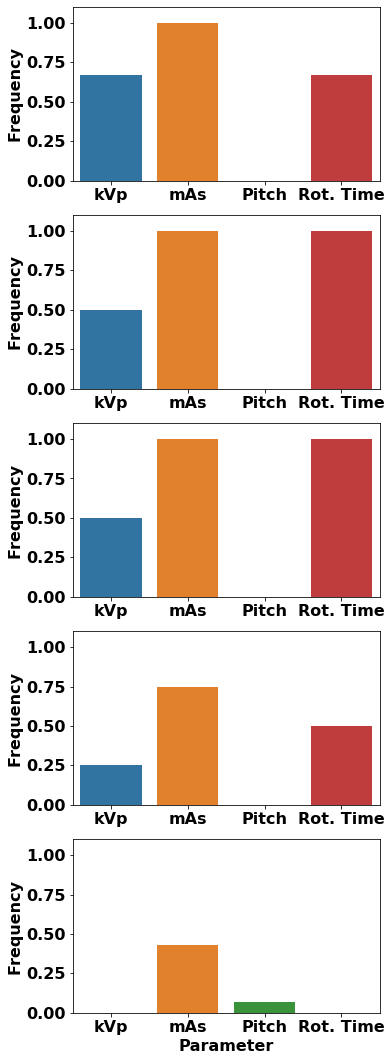

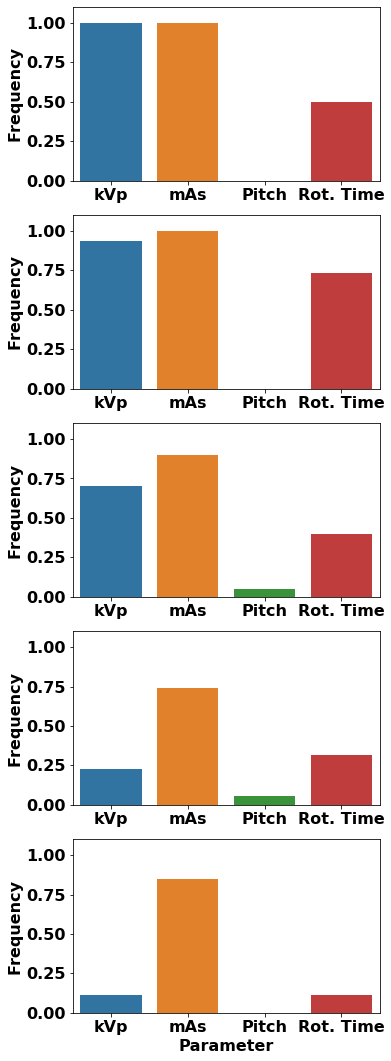

In [16]:
%matplotlib inline

changed_df = pd.DataFrame(changedDataInfo)

fig = plt.figure()
for j in ['Chest','Abd-Pelvis']:
    cnt=1
    
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(5.5, 18.5)
    font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : fs}
    matplotlib.rc('font', **font)
    for i in ['0-2 yrs','3-6 yrs','7-10 yrs','11-14 yrs','15-18 yrs']:
        plt.subplot(5,1,cnt)
        ax = sns.barplot(x="Parameter", y="Frequency", data=changed_df.loc[(changed_df['Protocol']==j) & (changed_df['Age']==i),:])
        ax.xaxis.label.set_size(fs)
        ax.xaxis.label.set_fontweight('bold')
        ax.yaxis.label.set_size(fs)
        ax.yaxis.label.set_fontweight('bold')
        
        plt.ylim(0,1.1)        
        cnt = cnt+1
        plt.xlabel('')
        if (i=='15-18 yrs'):
            ax.set(xlabel='Parameter')
    
    
    
    #plt.savefig('AnalysisResults/Figures/changedParameters/changedParameters-v3__percentileReported-'+str(percentilReported)+'__minNumDataPoints-'+str(minNumDataPoints)+'__whichPhase-'+str(whichPhase)+'__reqNoMissingData-'+str(reqNoMissingData)+'__Age-'+i+'__'+j+'_Protocols.pdf',dpi=1200)
    plt.savefig('AnalysisResults/Figures/changedParameters/changedParameters-v3__'+j+'_Protocols.pdf',dpi=1200)

    plt.show()
        
        # Save it

Now make the histogram of the CTDIvols and SSDE values for each of the age groups and protocols. To do so we have to re-read in the data.


In [17]:
# Load the Data
fname_dataIncluded_AbdPelv = '/dataIncluded_Abd-Pelvis.txt'
fname_dataIncluded_Chest = '/dataIncluded_Chest.txt'

dataIncluded_AbdPelv_df = pd.read_csv(directory_raw+fname_dataIncluded_AbdPelv, header = 0, sep='|')
dataIncluded_Chest_df = pd.read_csv(directory_raw+fname_dataIncluded_Chest, header = 0, sep='|')


cnt = 0
for i in np.arange(0,6):
    print('Age {}: Number {} '.format(i,np.sum(dataIncluded_AbdPelv_df['AgeGroup']==i)))
    cnt = cnt + np.sum(dataIncluded_AbdPelv_df['AgeGroup']==i)
print('Total Ped Abd-Pelv: {}'.format(cnt))

print()
cnt = 0
for i in np.arange(0,6):
    print('Age {}: Number {} '.format(i,np.sum(dataIncluded_Chest_df['AgeGroup']==i)))
    cnt = cnt + np.sum(dataIncluded_Chest_df['AgeGroup']==i)
print('Total Ped Chest: {}'.format(cnt))


Age 0: Number 0 
Age 1: Number 91 
Age 2: Number 451 
Age 3: Number 1070 
Age 4: Number 2141 
Age 5: Number 7892 
Total Ped Abd-Pelv: 11645

Age 0: Number 0 
Age 1: Number 123 
Age 2: Number 128 
Age 3: Number 84 
Age 4: Number 142 
Age 5: Number 475 
Total Ped Chest: 952


{'Adult', '7-10 yrs', '11-14 yrs', '3-6 yrs', '0-2 yrs', '15-18 yrs'}


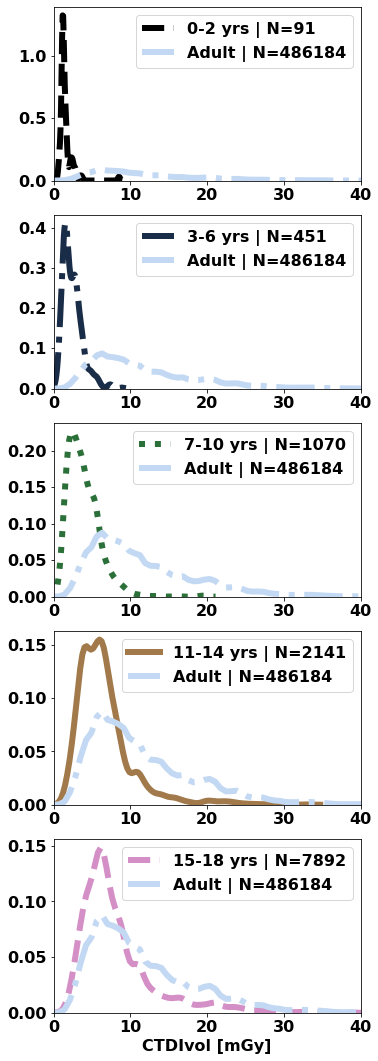

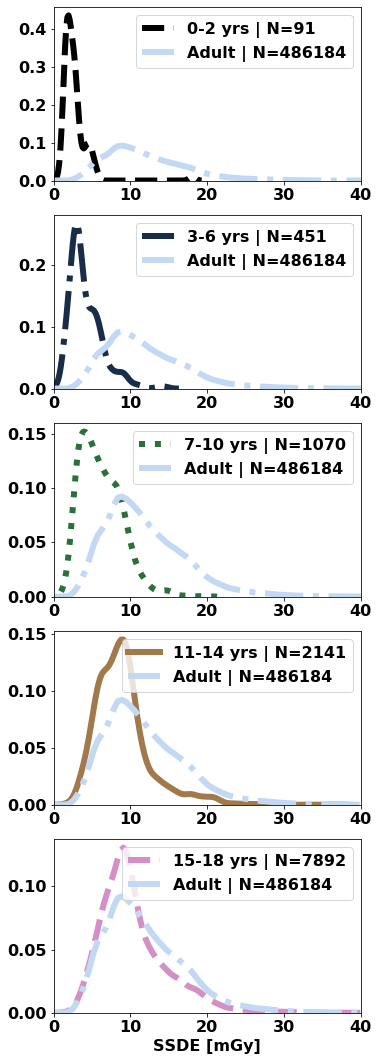

{'Adult', '7-10 yrs', '11-14 yrs', '3-6 yrs', '0-2 yrs', '15-18 yrs'}


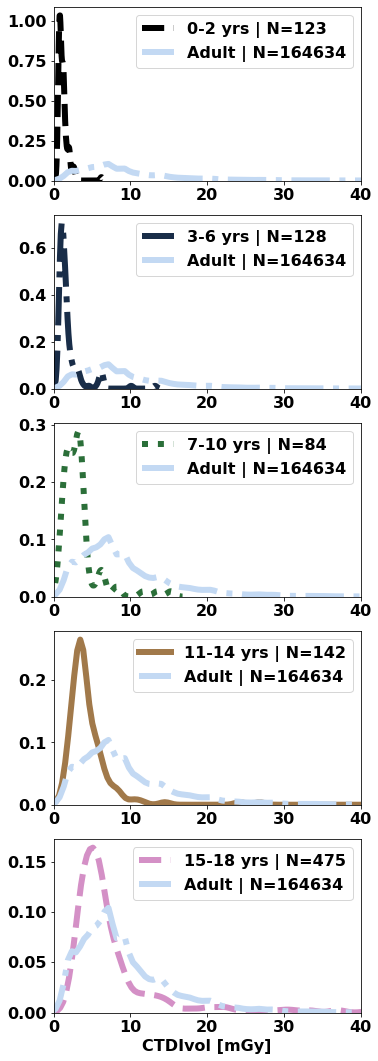

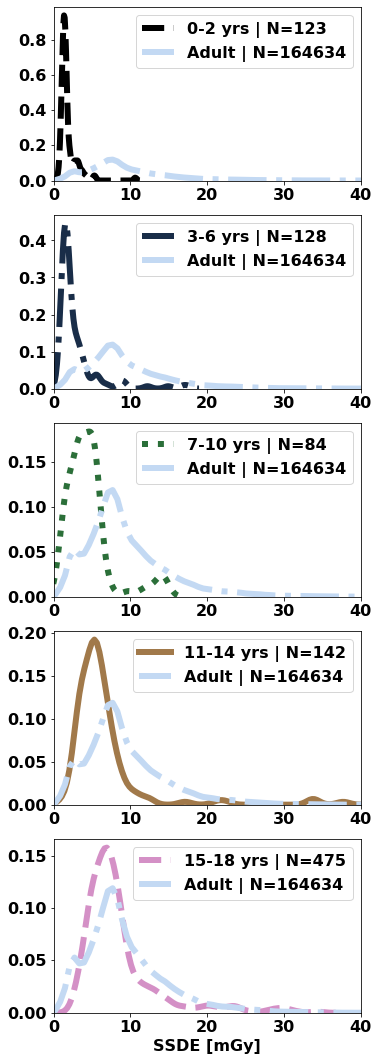

In [18]:
%matplotlib inline

# These are teh default values
percentilReported = 50
minNumDataPoints = 11
whichPhase = 1
reqNoMissingData = True


# Make plots for both the Abd-Pelvis and the Chest
for protoType in ['Abd-Pelvis','Chest']:

    if (protoType == 'Abd-Pelvis'):
        dataIncluded_thisProt_df = dataIncluded_AbdPelv_df
    elif(protoType=='Chest'):
        dataIncluded_thisProt_df = dataIncluded_Chest_df


    ages = ('N/A','0-2 yrs','3-6 yrs','7-10 yrs','11-14 yrs','15-18 yrs','Adult')
    print(set(dataIncluded_AbdPelv_df['AgeGroupOrder']))

   

    # Make the plot of the CTDIvol
    fig  = plt.figure()
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(5.5, 18.5)
    font = {'family' : 'DejaVu Sans',
            'weight' : 'bold',
            'size'   : fs}
    matplotlib.rc('font', **font)
    ax = matplotlib.pyplot.gca()
    ax.xaxis.label.set_size(fs)
    ax.xaxis.label.set_fontweight('bold')
    for j in np.arange(1,6):    
        # 

        alllocs_thisage_data = (dataIncluded_thisProt_df.loc[(dataIncluded_thisProt_df['AgeGroup']==j) ,:])

        holdj = j
        plt.subplot(5,1,j)
        sns.distplot(alllocs_thisage_data['CTDIvol'],norm_hist=True,label=ages[j]+' | N={}'.format(len(alllocs_thisage_data['CTDIvol'])),
            kde_kws={'linestyle':ls[j],'linewidth':lw,'clip': (0, 999999) },hist=False,color=cmap(((j-1)/6)))
        j = 6
        alllocs_thisage_data = (dataIncluded_thisProt_df.loc[(dataIncluded_thisProt_df['AgeGroup']==j) ,:])
        sns.distplot(alllocs_thisage_data['CTDIvol'],norm_hist=True,label=ages[j]+' | N={}'.format(len(alllocs_thisage_data['CTDIvol'])),
            kde_kws={'linestyle':ls[j],'linewidth':lw,'clip': (0, 999999) },hist=False,color=cmap(((j-1)/6)))
        plt.xlim(0,40)
        plt.legend()
        plt.ylabel('Frequency')
        plt.ylabel('')
        plt.xlabel('')

        if(holdj==5):
            plt.xlabel('CTDIvol [mGy]')
            ax = matplotlib.pyplot.gca()
            ax = matplotlib.pyplot.gca()
            ax.xaxis.label.set_size(fs)
            ax.xaxis.label.set_fontweight('bold')

    

    # Save the figure
    plt.savefig('AnalysisResults/Figures/ctdiVolHistoColumns/ctdiVolHisto-v3__percentileReported-'+str(percentilReported)+'__minNumDataPoints-'+str(minNumDataPoints)+'__whichPhase-'+str(whichPhase)+'__reqNoMissingData-'+str(reqNoMissingData)+'__'+protoType+'_Protocols.pdf',dpi=1200)
    plt.show()


    # Make the plot of the SSDE
    fig = plt.figure()
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(5.5, 18.5)
    font = {'family' : 'DejaVu Sans',
            'weight' : 'bold',
            'size'   : fs}
    matplotlib.rc('font', **font)
    ax = matplotlib.pyplot.gca()
    ax.xaxis.label.set_size(fs)
    ax.xaxis.label.set_fontweight('bold')
    for j in np.arange(1,6):
        alllocs_thisage_data = (dataIncluded_thisProt_df.loc[(dataIncluded_thisProt_df['AgeGroup']==j) ,:])
        holdj = j
        plt.subplot(5,1,j)
        sns.distplot(alllocs_thisage_data['SSDE'],norm_hist=True,label=ages[j]+' | N={}'.format(len(alllocs_thisage_data['CTDIvol'])),
            kde_kws={'linestyle':ls[j],'linewidth':lw,'clip': (0, 999999) },hist=False,color=cmap(((j-1)/6)))
        j=6
        alllocs_thisage_data = (dataIncluded_thisProt_df.loc[(dataIncluded_thisProt_df['AgeGroup']==j) ,:])

        sns.distplot(alllocs_thisage_data['SSDE'],norm_hist=True,label=ages[j]+' | N={}'.format(len(alllocs_thisage_data['CTDIvol'])),
            kde_kws={'linestyle':ls[j],'linewidth':lw,'clip': (0, 999999) },hist=False,color=cmap(((j-1)/6)))
        plt.xlim(0,40)
        plt.legend()
        plt.ylabel('Frequency')
        plt.ylabel('')
        plt.xlabel('')
        if (holdj==5):
            plt.xlabel('SSDE [mGy]')
            ax = matplotlib.pyplot.gca()
            ax.xaxis.label.set_size(fs)
            ax.xaxis.label.set_fontweight('bold')
    
    # Save the figure
    plt.savefig('AnalysisResults/Figures/ssdeHistoColumns/ssdeHisto-v3__percentileReported-'+str(percentilReported)+'__minNumDataPoints-'+str(minNumDataPoints)+'__whichPhase-'+str(whichPhase)+'__reqNoMissingData-'+str(reqNoMissingData)+'__'+protoType+'_Protocols.pdf',dpi=1200)
    plt.show()


## 6) Make plots of which protocols were included in the analysis

Abd Pelvis W IVCon                      160199
Abd Pelvis Kidney Calc                  113409
Abd Pelvis WO IVCon                      94355
Abd Pelvis                               71499
Abd Pelvis Uro                           13677
Abd Pelvis WO & W IVCon                  10885
Abd Pelvis Appx                           8123
Abd Pelvis Lo Dose                        4797
Abd Pelvis Lo Dose Kidney Calc            4762
Abd Pelvis Kidney Calc WO IVCon           4014
Abd Pelvis Lo Dose WO IVCon               2876
Abd Pelvis Lo Dose W IVCon                2137
Peds Abd Pelvis                           1588
Abd Pelvis Entero                         1228
Abd Pelvis Colongrphy                      926
Abd Pelvis Lo Dose WO & W IVCon            750
Peds Abd Pelvis W IVCon                    660
Peds Abd Pelvis Appx                       588
Abd Pelvis Appx Lo Dose                    427
Abd Pelvis Uro W IVCon                     221
Abd Pelvis Multiph Liver                   160
Peds Abd Pelv

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


Chst WO IVCon                          73506
Chst                                   44983
Chst W IVCon                           15246
Chst Lo Dose Screen                    12838
Chst Hi Res                             8032
Chst Lo Dose                            2989
Chst Super Dim                          2858
Chst Pulm Arts Embo                     1494
Chst Lo Dose WO IVCon                   1049
Chst Ltd Nodule WO IVCon                 631
Chst Pulm Arts Embo W IVCon              345
RT Plan Breast                           307
Chst Hi Res Lo Dose                      195
Peds Chst                                187
Chst 3D Image Airway                     163
Chst Airway                              156
Chst Lo Dose Ltd Nodule                  127
Chst Hi Res W IVCon                       89
RT Plan Chst                              71
Chst WO & W IVCon                         67
Chst Hi Res WO IVCon                      56
Peds Chst W IVCon                         53
Peds Chst 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


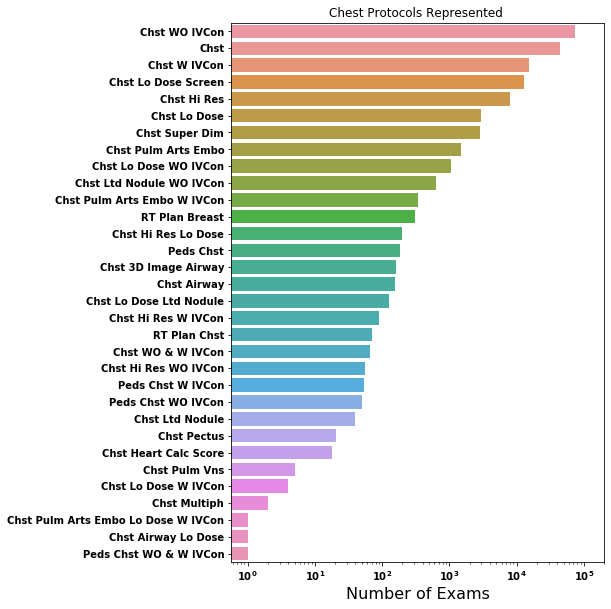

In [19]:
%matplotlib inline


####### Make some descripive plots #############
for protoType in ['Abd-Pelvis','Chest']:

    if (protoType == 'Abd-Pelvis'):
        dataIncluded_thisProt_df = dataIncluded_AbdPelv_df
    elif(protoType=='Chest'):
        dataIncluded_thisProt_df = dataIncluded_Chest_df


    
    ##### Bar Chart
    protoCats = dataIncluded_thisProt_df['AcquisitionProtocol'].value_counts(normalize = True).index.tolist()
    protoCounts = dataIncluded_thisProt_df['AcquisitionProtocol'].value_counts(normalize = False)

    print(protoCounts)
    barfig = plt.figure()
    barfig = sns.barplot(y=protoCats,x=protoCounts)
    barfig.set_xscale('log')
    plt.xlabel('Number of Exams')
    plt.xlim(0,200000)
    plt.title(protoType+' Protocols Represented ')
    plt.tight_layout()
    
    barfig.xaxis.label.set_size(fs)
    barfig.xaxis.label.set_fontweight('normal')
    barfig.yaxis.label.set_size(fs)
    barfig.yaxis.label.set_fontweight('normal')
    
    if(protoType=='Chest'):
        plt.gcf().set_size_inches(12, 10)
    elif(protoType=='Abd-Pelvis'):
        plt.gcf().set_size_inches(10.75, 8)
        plt.gcf().set_size_inches(12, 10)

    plt.savefig('AnalysisResults/Figures/representedProtocols/barChart_'+protoType+'_Protocols.pdf',dpi=1200)
    plt.show()